<a href="https://colab.research.google.com/github/confusedolive/Jeronimo-CE888/blob/main/lab07/task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


##Task 3:
Please consider this Time Series Prediction with LSTM Recurrent Neural Networks. We can see that the LSTM model in the code below has an average error of about 23 passengers (in thousands) on the training dataset, and about 53 passengers (in thousands) on the test dataset. Not that bad. Can you please improve the performance? Changed train / test size, number of neurons and improved perfromance

#Dataset Discription
The problem we are going to look at in this post is the International Airline Passengers prediction problem. This is a problem where, given a year and a month, the task is to predict the number of international airline passengers in units of 1,000. The data ranges from January 1949 to December 1960, or 12 years, with 144 observations.

In [1]:
from keras import layers, models
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.preprocessing.text import Tokenizer
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.layers import Dense
from keras.layers import Embedding, SimpleRNN
import numpy
import math
import matplotlib.pyplot as plt
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.callbacks import EarlyStopping

convert an array of values into a dataset matrix

In [5]:
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
dataframe = read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

Normalize dataset adn reshape

In [6]:
train_size = int(len(dataset) * 0.30) #change size of train and test size it showed an improvement in the model, anything below 30 train size would diminish the models abilities
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [7]:
callback = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True) #Added callback to avoid overfitting
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(5, input_shape=(1, look_back))) #Five neurones performed better then 4
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
mod = model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2, callbacks=callback, validation_data=(testX, testY)) #added validation to plot loss curve and address over or under fitting

Epoch 1/100
41/41 - 2s - loss: 0.0081 - val_loss: 0.2000
Epoch 2/100
41/41 - 0s - loss: 0.0036 - val_loss: 0.1703
Epoch 3/100
41/41 - 0s - loss: 0.0029 - val_loss: 0.1580
Epoch 4/100
41/41 - 0s - loss: 0.0028 - val_loss: 0.1508
Epoch 5/100
41/41 - 0s - loss: 0.0028 - val_loss: 0.1464
Epoch 6/100
41/41 - 0s - loss: 0.0027 - val_loss: 0.1404
Epoch 7/100
41/41 - 0s - loss: 0.0027 - val_loss: 0.1403
Epoch 8/100
41/41 - 0s - loss: 0.0025 - val_loss: 0.1309
Epoch 9/100
41/41 - 0s - loss: 0.0025 - val_loss: 0.1294
Epoch 10/100
41/41 - 0s - loss: 0.0024 - val_loss: 0.1219
Epoch 11/100
41/41 - 0s - loss: 0.0024 - val_loss: 0.1182
Epoch 12/100
41/41 - 0s - loss: 0.0023 - val_loss: 0.1152
Epoch 13/100
41/41 - 0s - loss: 0.0023 - val_loss: 0.1120
Epoch 14/100
41/41 - 0s - loss: 0.0022 - val_loss: 0.1053
Epoch 15/100
41/41 - 0s - loss: 0.0022 - val_loss: 0.1035
Epoch 16/100
41/41 - 0s - loss: 0.0021 - val_loss: 0.0957
Epoch 17/100
41/41 - 0s - loss: 0.0021 - val_loss: 0.0934
Epoch 18/100
41/41 - 0s

In [8]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 14.99 RMSE
Test Score: 40.01 RMSE


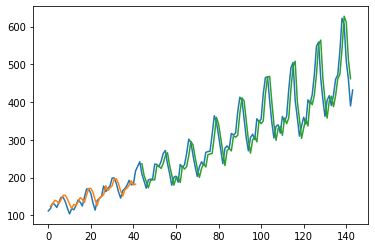

In [9]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

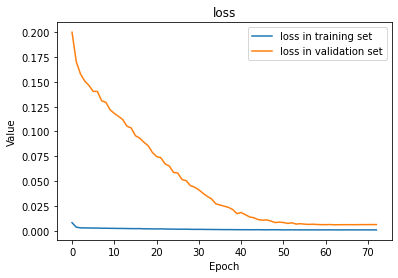

In [10]:
def plot_curve(metric, save=False, saveas='test'):
    '''Plots the learning curve for the model
    based on history, metric takes any acceptable metric
    by the model e.g. Loss, if save is set to true
    saves a copy of the graph under the name specified
    in saveas by default is test'''
    plt.plot(mod.history[metric], label=f'{metric} in training set')
    plt.plot(mod.history[f'val_{metric}'],
             label=f'{metric} in validation set')
    plt.title(metric)
    plt.ylabel('Value')
    plt.xlabel('Epoch')
    plt.legend()
    if save:
        plt.savefig(f'{saveas}')
    plt.show()
plot_curve('loss')

Increased performance from train score : 22:64 RMSE Test score: 52.71 RMSE, 
to Train Score: 14.99 RMSE Test Score: 40.01 RMSE by changing train size to 30% , lstm layer neurons 5, and adding a callback monitoring validation loss with patience 5

Testign with lookback sizes


In [21]:
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
dataframe = read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
train_size = int(len(dataset) * 0.70) 
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 40 #changed lookback to 40 to see effec it has
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
callback = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True) #Added callback to avoid overfitting
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back))) 
model.add(Dense(1)) #increase numbered of neurons in dense layer
model.compile(loss='mean_squared_error', optimizer='adam')
mod = model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2, callbacks=callback, validation_data=(testX, testY)) #added validation to plot loss curve and address over or under fitting


Epoch 1/100
59/59 - 2s - loss: 0.1158 - val_loss: 0.2925
Epoch 2/100
59/59 - 0s - loss: 0.0258 - val_loss: 0.0464
Epoch 3/100
59/59 - 0s - loss: 0.0079 - val_loss: 0.0228
Epoch 4/100
59/59 - 0s - loss: 0.0072 - val_loss: 0.0188
Epoch 5/100
59/59 - 0s - loss: 0.0069 - val_loss: 0.0195
Epoch 6/100
59/59 - 0s - loss: 0.0066 - val_loss: 0.0165
Epoch 7/100
59/59 - 0s - loss: 0.0063 - val_loss: 0.0137
Epoch 8/100
59/59 - 0s - loss: 0.0061 - val_loss: 0.0141
Epoch 9/100
59/59 - 0s - loss: 0.0054 - val_loss: 0.0161
Epoch 10/100
59/59 - 0s - loss: 0.0052 - val_loss: 0.0129
Epoch 11/100
59/59 - 0s - loss: 0.0048 - val_loss: 0.0120
Epoch 12/100
59/59 - 0s - loss: 0.0046 - val_loss: 0.0102
Epoch 13/100
59/59 - 0s - loss: 0.0040 - val_loss: 0.0072
Epoch 14/100
59/59 - 0s - loss: 0.0039 - val_loss: 0.0066
Epoch 15/100
59/59 - 0s - loss: 0.0035 - val_loss: 0.0057
Epoch 16/100
59/59 - 0s - loss: 0.0032 - val_loss: 0.0044
Epoch 17/100
59/59 - 0s - loss: 0.0030 - val_loss: 0.0042
Epoch 18/100
59/59 - 0s

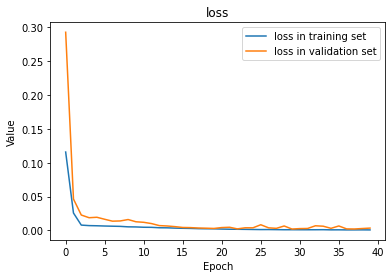

In [22]:
plot_curve('loss')

In [23]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 16.88 RMSE
Test Score: 23.84 RMSE


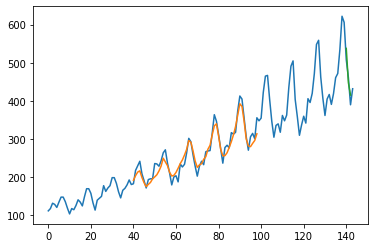

In [24]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

Increased performance from train score : 22:64 RMSE Test score: 52.71 RMSE, 
to Train Score: 16.88 RMSE Test Score: 23.84 RMSE by changing lookback to 40, train size to 70% , lstm layer neurons 4, and adding a callback monitoring validation loss with patience 5